In [2]:
import pandas as pd
import numpy as np
import os
import json
import csv
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Bidirectional, Embedding, LSTM
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import backend as kb
from keras import initializers
from keras.callbacks import ReduceLROnPlateau
from keras.models import load_model
from highcharts import Highchart
#!pip import python_highcharts
import matplotlib.pyplot as plt

Using TensorFlow backend.


(6730, 10, 4)


C:\Users\wangz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 4711 samples, validate on 2019 samples
Epoch 1/20
4711/4711 [==============================] - 5s 1ms/step - loss: 0.4882 - accuracy: 0.7954 - val_loss: 0.9321 - val_accuracy: 0.8673
Epoch 2/20
4711/4711 [==============================] - 2s 480us/step - loss: 0.3655 - accuracy: 0.8550 - val_loss: 0.8176 - val_accuracy: 0.8034
Epoch 3/20
4711/4711 [==============================] - 2s 479us/step - loss: 0.3513 - accuracy: 0.8576 - val_loss: 0.7763 - val_accuracy: 0.8514
Epoch 4/20
4711/4711 [==============================] - 2s 477us/step - loss: 0.3114 - accuracy: 0.8835 - val_loss: 0.6570 - val_accuracy: 0.8653
Epoch 5/20
4711/4711 [==============================] - 2s 483us/step - loss: 0.2975 - accuracy: 0.9015 - val_loss: 0.6434 - val_accuracy: 0.8063
Epoch 6/20
4711/4711 [==============================] - 2s 477us/step - loss: 0.2905 - accuracy: 0.9058 - val_loss: 0.5798 - val_accuracy: 0.8385
Epoch 7/20
4711/4711 [==============================] - 2s 478us/step - loss: 

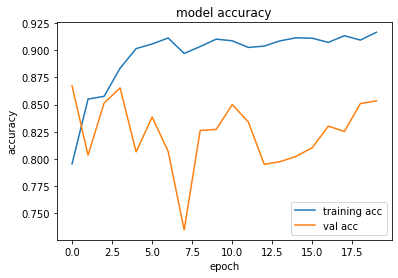

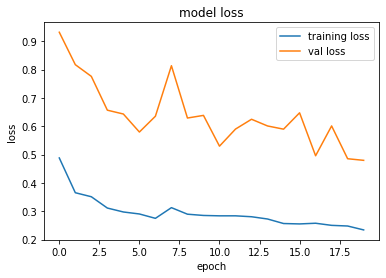

In [18]:
x_train = np.load("dataset/data/x_train_talking.npy")
x_test = np.load("dataset/data/x_test_talking.npy")
y_train = np.load("dataset/data/y_train_talking.npy")
y_test = np.load("dataset/data/y_test_talking.npy")
print(x_train.shape)
# set parameters:
batch_size = 64
nb_epoch = 20
n_RNN_nodes = 128
recurrent_dropout = 0.25
drop_out = 0.5
model = Sequential()
model.add(Bidirectional(LSTM(units=n_RNN_nodes, return_sequences=True, recurrent_dropout=recurrent_dropout, dropout=drop_out, name='hidden_layer1', kernel_initializer=initializers.random_normal(stddev=0.01))))
model.add(Bidirectional(LSTM(units=n_RNN_nodes, return_sequences=False, recurrent_dropout=recurrent_dropout,dropout=drop_out, name='hidden_layer2', kernel_initializer=initializers.random_normal(stddev=0.01))))
model.add(Dropout(drop_out))
model.add(Dense(units=32, activation='relu', name='dense_layer', kernel_initializer=initializers.random_normal(stddev=0.001)))
model.add(Dropout(drop_out))
model.add(Dense(1, activation='sigmoid', name='output_layer', kernel_initializer=initializers.random_normal(stddev=0.001)))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=10, verbose=0, mode='auto', epsilon=0.00001, min_lr=0.0001)
history = model.fit(x_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch, validation_split=0.3, shuffle = True, callbacks=[reduce_lr], verbose = 1) 
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

fig = plt.figure()#
model_id = 'talking.h5'
plt.plot(history.history['accuracy'],label='training acc')
plt.plot(history.history['val_accuracy'],label='val acc')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
fig.savefig('modelFigures/'+str(model_id)+'acc.png')
fig = plt.figure()
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
fig.savefig('modelFigures/'+str(model_id)+'loss.png')

#model.save("model/talking.h5") 

(4509, 10, 4)


C:\Users\wangz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 3156 samples, validate on 1353 samples
Epoch 1/30
3156/3156 [==============================] - 5s 2ms/step - loss: 0.6930 - accuracy: 0.5111 - val_loss: 0.6721 - val_accuracy: 1.0000
Epoch 2/30
3156/3156 [==============================] - 2s 501us/step - loss: 0.6617 - accuracy: 0.5976 - val_loss: 0.4932 - val_accuracy: 0.9719
Epoch 3/30
3156/3156 [==============================] - 2s 489us/step - loss: 0.5981 - accuracy: 0.6835 - val_loss: 0.4497 - val_accuracy: 0.9749
Epoch 4/30
3156/3156 [==============================] - 2s 495us/step - loss: 0.5967 - accuracy: 0.6863 - val_loss: 0.4630 - val_accuracy: 0.9712
Epoch 5/30
3156/3156 [==============================] - 2s 495us/step - loss: 0.5760 - accuracy: 0.6885 - val_loss: 0.4072 - val_accuracy: 0.9808
Epoch 6/30
3156/3156 [==============================] - 2s 494us/step - loss: 0.5740 - accuracy: 0.6939 - val_loss: 0.3986 - val_accuracy: 0.9830
Epoch 7/30
3156/3156 [==============================] - 2s 493us/step - loss: 

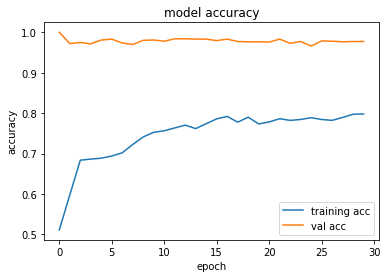

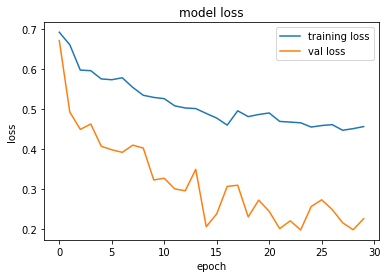

In [23]:
x_train = np.load("dataset/data/x_train_confusing.npy")
x_test = np.load("dataset/data/x_test_confusing.npy")
y_train = np.load("dataset/data/y_train_confusing.npy")
y_test = np.load("dataset/data/y_test_confusing.npy")
print(x_train.shape)
# set parameters:
batch_size = 64
nb_epoch = 30
n_RNN_nodes = 128
recurrent_dropout = 0.25
drop_out = 0.5
model = Sequential()
model.add(Bidirectional(LSTM(units=n_RNN_nodes, return_sequences=True, recurrent_dropout=recurrent_dropout, dropout=drop_out, name='hidden_layer1', kernel_initializer=initializers.random_normal(stddev=0.01))))
model.add(Bidirectional(LSTM(units=n_RNN_nodes, return_sequences=False, recurrent_dropout=recurrent_dropout,dropout=drop_out, name='hidden_layer2', kernel_initializer=initializers.random_normal(stddev=0.01))))
model.add(Dropout(drop_out))
model.add(Dense(units=32, activation='relu', name='dense_layer', kernel_initializer=initializers.random_normal(stddev=0.001)))
model.add(Dropout(drop_out))
model.add(Dense(1, activation='sigmoid', name='output_layer', kernel_initializer=initializers.random_normal(stddev=0.001)))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=10, verbose=0, mode='auto', epsilon=0.00001, min_lr=0.0001)
history = model.fit(x_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch, validation_split=0.3, shuffle = True, callbacks=[reduce_lr], verbose = 1) 
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

fig = plt.figure()#
model_id = 'confusing.h5'
plt.plot(history.history['accuracy'],label='training acc')
plt.plot(history.history['val_accuracy'],label='val acc')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
fig.savefig('modelFigures/'+str(model_id)+'acc.png')
fig = plt.figure()
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
fig.savefig('modelFigures/'+str(model_id)+'loss.png')

#model.save("model/confusing.h5") 

In [32]:
#prepare ensemble training data

x_train = np.load("dataset/data/x_train_ensemble.npy")
x_test = np.load("dataset/data/x_test_ensemble.npy")
Y_TRAIN = np.load("dataset/data/y_train_ensemble.npy")
Y_TEST = np.load("dataset/data/y_test_ensemble.npy")

model = load_model("model/talking.h5")
r1 = model.predict(x_train)
r2 = model.predict(x_test)

model = load_model("model/confusing.h5")
r3 = model.predict(x_train)
r4 = model.predict(x_test)

X_TRAIN = []
for i in range(len(r1)):
    X_TRAIN.append([[r1[i][0]],[r3[i][0]]])
X_TRAIN = np.array(X_TRAIN)

X_TEST = []
for i in range(len(r2)):
    X_TEST.append([[r2[i][0]],[r4[i][0]]])
X_TEST = np.array(X_TEST)

In [44]:
batch_size = 64
nb_epoch = 30
n_RNN_nodes = 128
recurrent_dropout = 0.25
drop_out = 0.5
model = Sequential()
model.add(Bidirectional(LSTM(units=n_RNN_nodes, return_sequences=True, recurrent_dropout=recurrent_dropout, dropout=drop_out, name='hidden_layer1', kernel_initializer=initializers.random_normal(stddev=0.01))))
model.add(Bidirectional(LSTM(units=n_RNN_nodes, return_sequences=False, recurrent_dropout=recurrent_dropout,dropout=drop_out, name='hidden_layer2', kernel_initializer=initializers.random_normal(stddev=0.01))))
model.add(Dropout(drop_out))
model.add(Dense(units=16, activation='relu', name='dense_layer', kernel_initializer=initializers.random_normal(stddev=0.01)))
model.add(Dropout(drop_out))
model.add(Dense(1, activation='sigmoid', name='output_layer', kernel_initializer=initializers.random_normal(stddev=0.01)))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=10, verbose=0, mode='auto', epsilon=0.0001, min_lr=0.001)
history5 = model.fit(X_TRAIN, Y_TRAIN, batch_size=batch_size, nb_epoch=nb_epoch, validation_split=0.1, shuffle = True, callbacks=[reduce_lr], verbose = 1) 
score = model.evaluate(X_TEST, Y_TEST)
print('Test score:', score[0])
print('Test accuracy:', score[1])

C:\Users\wangz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Train on 3189 samples, validate on 355 samples
Epoch 1/30
3189/3189 [==============================] - 10s 3ms/step - loss: 0.6699 - accuracy: 0.7087 - val_loss: 1.2110 - val_accuracy: 0.0000e+00
Epoch 2/30
3189/3189 [==============================] - 1s 223us/step - loss: 0.5899 - accuracy: 0.7109 - val_loss: 1.1631 - val_accuracy: 0.0000e+00
Epoch 3/30
3189/3189 [==============================] - 1s 220us/step - loss: 0.5536 - accuracy: 0.7121 - val_loss: 0.9372 - val_accuracy: 0.0000e+00
Epoch 4/30
3189/3189 [==============================] - 1s 221us/step - loss: 0.4852 - accuracy: 0.7720 - val_loss: 0.9581 - val_accuracy: 0.0000e+00
Epoch 5/30
3189/3189 [==============================] - 1s 231us/step - loss: 0.4462 - accuracy: 0.7874 - val_loss: 0.8769 - val_accuracy: 0.3296
Epoch 6/30
3189/3189 [==============================] - 1s 218us/step - loss: 0.4332 - accuracy: 0.7868 - val_loss: 0.6231 - val_accuracy: 0.8028
Epoch 7/30
3189/3189 [==============================] - 1s 223

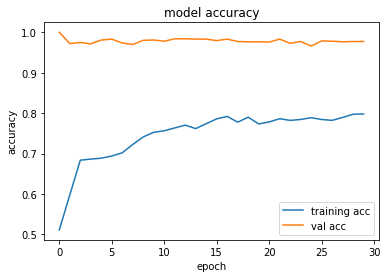

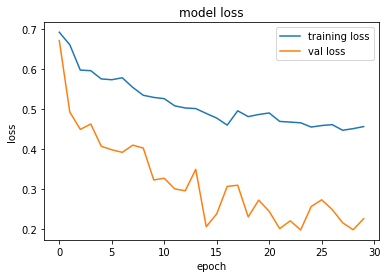

In [41]:
fig = plt.figure()#
model_id = 'ensemble.h5'
plt.plot(history.history['accuracy'],label='training acc')
plt.plot(history.history['val_accuracy'],label='val acc')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
fig.savefig('modelFigures/'+str(model_id)+'acc.png')
fig = plt.figure()
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
fig.savefig('modelFigures/'+str(model_id)+'loss.png')

#model.save("model/ensemble.h5") 

In [28]:
X_TEST = np.load("dataset/data/x_test_ensemble.npy")
Y_TEST = np.load("dataset/data/y_test_ensemble.npy")
model = load_model("model/talking.h5")
score = model.evaluate(X_TEST, Y_TEST)
print('Test score:', score[0])
print('Test accuracy:', score[1])

3544/3544 [==============================] - 3s 985us/step
Test score: 0.41244651844754443
Test accuracy: 0.8411399722099304
